# Credit Risk Modelling :


** Dataset Info  - **
The Dataset contains 150,000 rows and 12 columns, 1 ID Column and ther s described below.

1. ** SeriousDlqin2yrs -** this particular attribute indicates whether the borrower has experienced any past dues until 90 days in the previous 2 years. ** This is our target variable. **
2. ** Resolving utilization of unsecured lines -** This attribute indicates the credit card limits of the borrower after excluding any current loan debt and real estate.
3. **Age. **
4. **NumberOfTime30-59DaysPastDueNotWorse -** The number of this attribute indicates the number of times borrowers have paid their EMIs late but have paid them 30 days after the due date or 59 days before the due date.
5. **DebtRatio - ** If my monthly debt is \$200 and my other expenditure is \$500, then I spend \$700 monthly. If my monthly income is \$1,000, then the value of the DebtRatio is \$700/\$1,000 = 0.7000
6. **MonthlyIncome **
7. **NumberOfOpenCreditLinesAndLoans -** This attribute indicates the number of open loans and/or the number of credit cards the borrower holds.
8. **NumberOfTimes90DaysLate -** This attribute indicates how many times a borrower has paid their dues 90 days after the due date of their EMIs.
9. **NumberRealEstateLoansOrLines -** This attribute indicates the number of loans the borrower holds for their real estate or the number of home loans a borrower has.
10. **NumberOfTime60-89DaysPastDueNotWorse -** This attribute indicates how many times borrowers have paid their EMIs late but paid them 60 days after their due date or 89 days before their due date.
11. **NumberOfDependents -** This attribute is self-explanatory as well. It indicates the number of dependent family members the borrowers have. The dependent count is excluding the borrower.

** Problem Statement - ** 
> When a financial institute lends money to a customer, they are taking some kind of risk. So, before lending, financial institutes check whether or not the borrower will have enough money in the future to pay back their loan. Based on the customer's current income and expenditure, many financial institutes perform some kind of analysis that helps them decide whether the borrower will be a good customer for that bank or not. This kind of analysis is manual and time-consuming. So, it needs some kind of automation. We are tring to automate this process.


** ML Problem Statement - **
> Given a bunch of features predict whether the person defaults or not. It is a binary clasification problem.

## Importing the libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
import re
plt.style.use('ggplot')

## Loading the dataset :

In [2]:
credit_train = pd.read_csv('cs-training.csv')
credit_train.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [3]:
credit_test = pd.read_csv('cs-test.csv')
credit_test.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0


## Data Preprocessing :

In [4]:
# Removing the Id Column as it is pretty much useless.
credit_train = credit_train.drop('ID', axis = 1)
credit_train.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [5]:
# ID Column in test data is Unnamed: 0
credit_test = credit_test.drop('Unnamed: 0', axis = 1)

In [6]:
# Finding Missing Values - 
credit_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

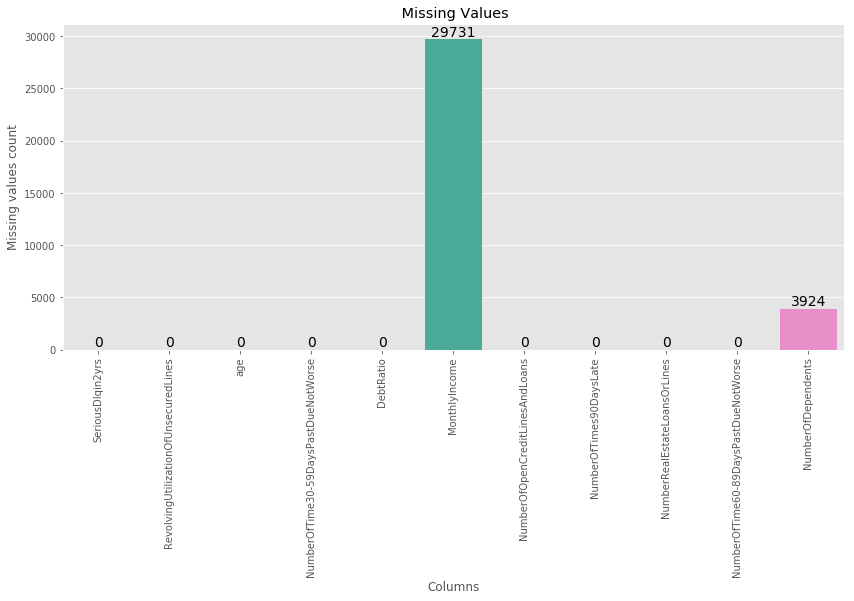

In [7]:
plt.figure(figsize=(14,6))
x = credit_train.columns
y = credit_train.isnull().sum()
sns.barplot(x, y).set_title(" Missing Values")
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/ 2.0, height + 2,
           int(height), fontsize = 14, ha = 'center', va = 'bottom')

ax.set_xlabel("Columns")
ax.set_ylabel("Missing values count")
plt.xticks(rotation = 90)
plt.show()

##### Removing NaN Values using Median Replacement :

In [8]:
# We will replace the Missing values with the median value of the column:
credit_train = credit_train.fillna(credit_train.median())
credit_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Data Analysis :

In [9]:
# Checking distribution of data .
total_len = len(credit_train['SeriousDlqin2yrs'])
precentage_labels = credit_train['SeriousDlqin2yrs'].value_counts() / total_len * 100.0
precentage_labels

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

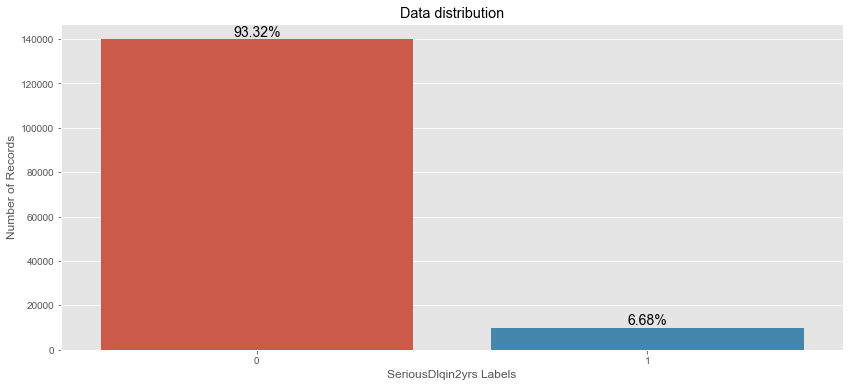

In [10]:
plt.figure(figsize=(14,6))
sns.countplot(credit_train['SeriousDlqin2yrs']).set_title("Data distribution")
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.0, height + 2,
            '{:.2f}%'.format(100 * height/ total_len), fontsize = 14, ha = 'center', va = 'bottom')

sns.set(font_scale = 1.5)
ax.set_xlabel("SeriousDlqin2yrs Labels")
ax.set_ylabel("Number of Records")
plt.show()

** Conclusion **
1. The dataset is highly imbalanced.
2. Around 140,000 records/rows belong to label 0 and only 10,000 records belong to label 1.

In [11]:
# Getting data info.
credit_train[credit_train.columns[1:]].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


** Some Observations - **
1. Most of the people have debts around 353\$ with a standard deviation of 2037\$ but some people have huge debts like almost 330K \$ 
2. Most of the people who take loans are around the age of 50. And it is also seen that there is at-least 1 person whose age is 0 but has applied for loan, this record has to analyzed further, also there is a person whose age is 109 years
3. Some people applying for loans have a monthly income of 0 !!.

### Correlation between features :

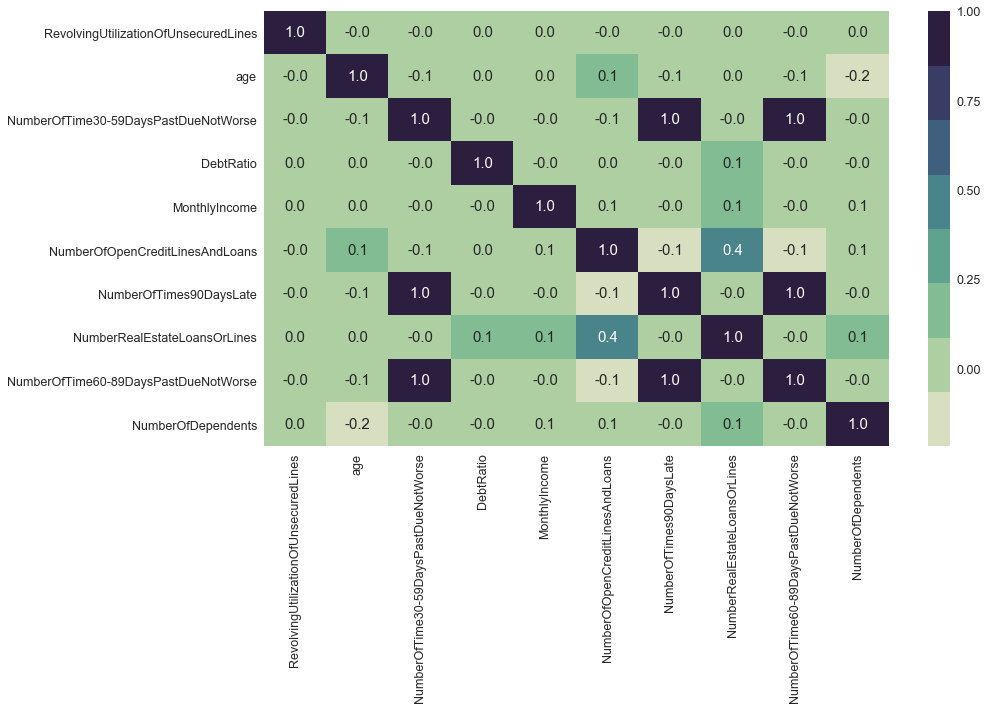

In [12]:
plt.figure(figsize = (14,8))
sns.set(font_scale = 1.25)
sns.heatmap(credit_train[credit_train.columns[1:]].corr(),annot = True, fmt = ".1f", 
           cmap = (sns.cubehelix_palette(8, start = 0.5, rot = -0.75)))
plt.show()

** Some Observations - <br>**
1. Some Features are highly correlated, infact correlation is 1 between some features, so we might need to remove these when training a model.
2. numberoftime3059dayspastduenotworse is highyl correlated with numberoftimes90dayslate and numberoftime6089dayspastduenotworse

### Detecting Outliers :

#### Percentile Based Outlier Detection :

In [13]:
def percentile_outlier(data, threshold = 0.95): #95th percentile.
    diff = (100 - threshold)/2.0
    minval, maxval = np.percentile(data, [diff, 100-diff])
    return ((data < minval) | (data > maxval))

#### Median Absolute Deviation method :

In [14]:
def mad_outlier(points, threshold = 3.5):
    med_y = np.median(points)
    mad_y = np.median([np.abs(y - med_y)  for y in points])
    modified_zscore = [0.6745 * (y - med_y) / mad_y  for y in points]
    return np.abs(modified_zscore) > threshold

#### standard Deviation based outlier detection :

In [15]:
def std_div(data, threshold = 3):
    std = data.std()
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

#### Majority Vote Based Outlier detection :

In [16]:
def outlierVote(data):
    x = percentile_outlier(data)
    y = mad_outlier(data)
    z = std_div(data)
    temp = list(zip([i for i in range(len(x))], x, y, z))
    final = []
    for i in range(len(x)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
            
    return final

#### Visualizing Outliers :

In [17]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows = 4)
    for ax, func in zip(axes, [percentile_outlier, mad_outlier, std_div, outlierVote]):
        sns.distplot(x, ax = ax, rug = True, hist = False)
        outliers = func(x)
        outliers = x[outliers]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on = False)
        
    kwargs = dict(y = 0.95, x = 0.05, ha = 'left', va = 'top', size = 20)
    axes[0].set_title('Percentile Based Outlier Detection', **kwargs)
    axes[1].set_title('Median Absolute Deviation Method', **kwargs)
    axes[2].set_title('Standard Deviation Based Detection', **kwargs)
    axes[3].set_title('Majority Vote Outlier Detection', **kwargs)
    plt.suptitle("Comparing outlier test with n = {}".format(len(x)), size = 20)
    fig = plt.gcf()
    fig.set_size_inches(15, 10)

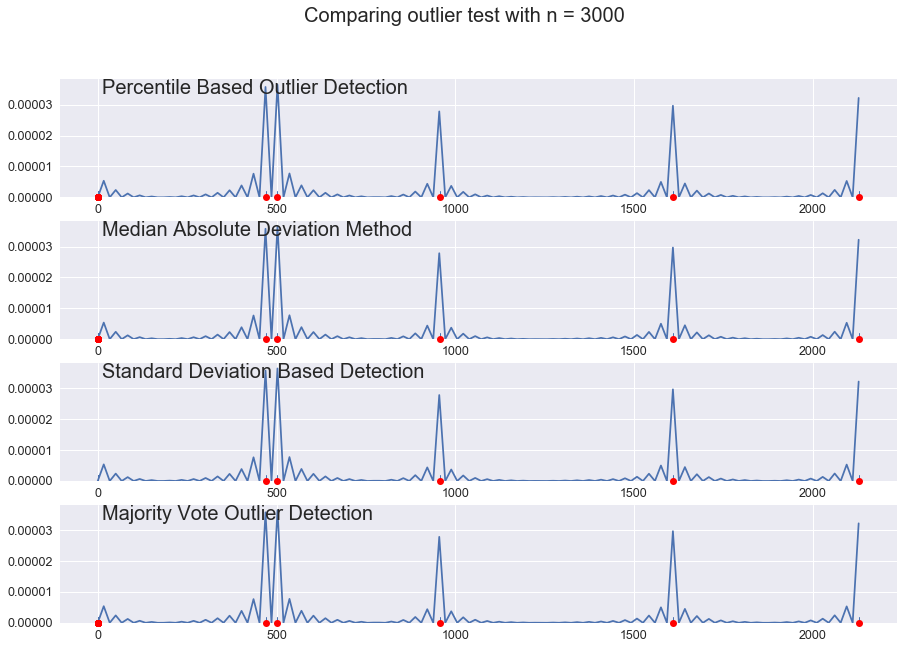

In [18]:
plotOutlier(credit_train['RevolvingUtilizationOfUnsecuredLines'].sample(3000).values)

In [19]:
# Removing the outliers.
revNew = []
for val in credit_train['RevolvingUtilizationOfUnsecuredLines']:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
credit_train['RevolvingUtilizationOfUnsecuredLines'] = revNew

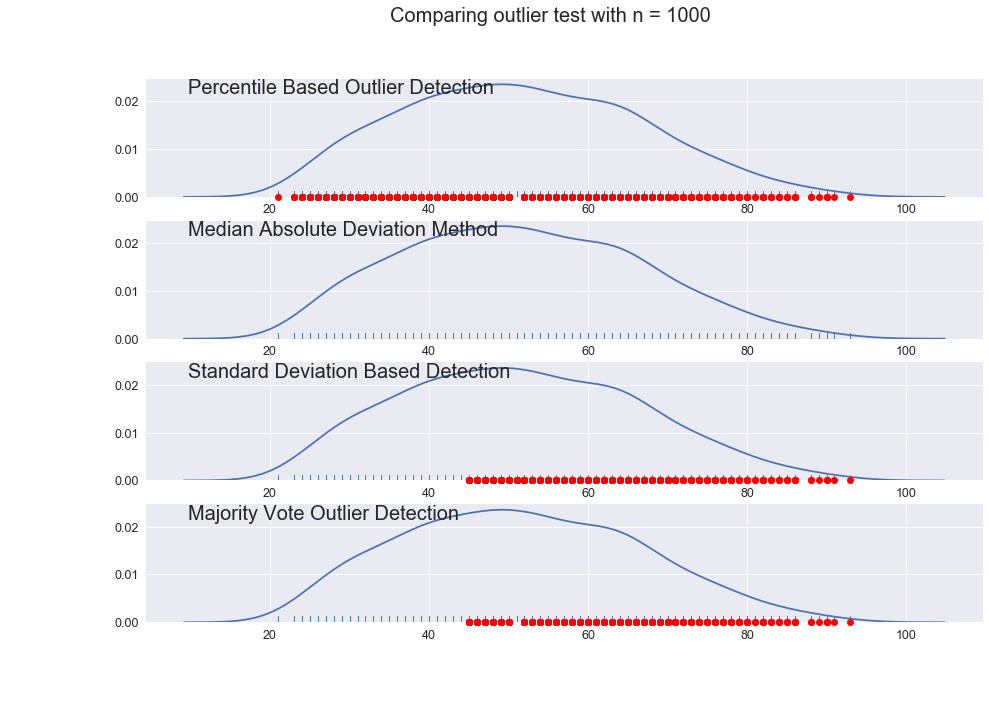

In [20]:
# checking outliers for Age ->
plotOutlier(credit_train['age'].sample(1000).values)

In [21]:
# Removing outliers from age ->
ageNew = []
for val in credit_train['age']:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
credit_train['age'] = ageNew

C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Prakhar\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in greater


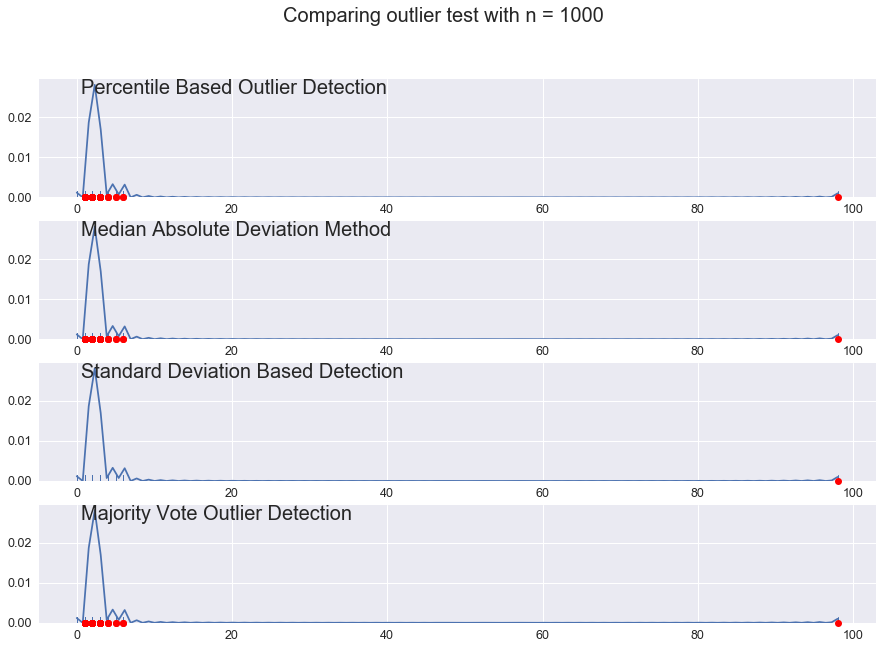

In [22]:
# For Number of Times 30-59 days past due not worse feature- >
plotOutlier(credit_train['NumberOfTime30-59DaysPastDueNotWorse'].sample(1000).values)

In [23]:
# checking distribution of values.
import collections
collections.Counter(credit_train['NumberOfTime30-59DaysPastDueNotWorse'])

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

In [24]:
# Removing outliers ->
New = []
med = credit_train['NumberOfTime30-59DaysPastDueNotWorse'].median()
for val in credit_train['NumberOfTime30-59DaysPastDueNotWorse']:
    if val == 96 or val == 98:
        New.append(med)
    else:
        New.append(val)

credit_train['NumberOfTime30-59DaysPastDueNotWorse'] = New

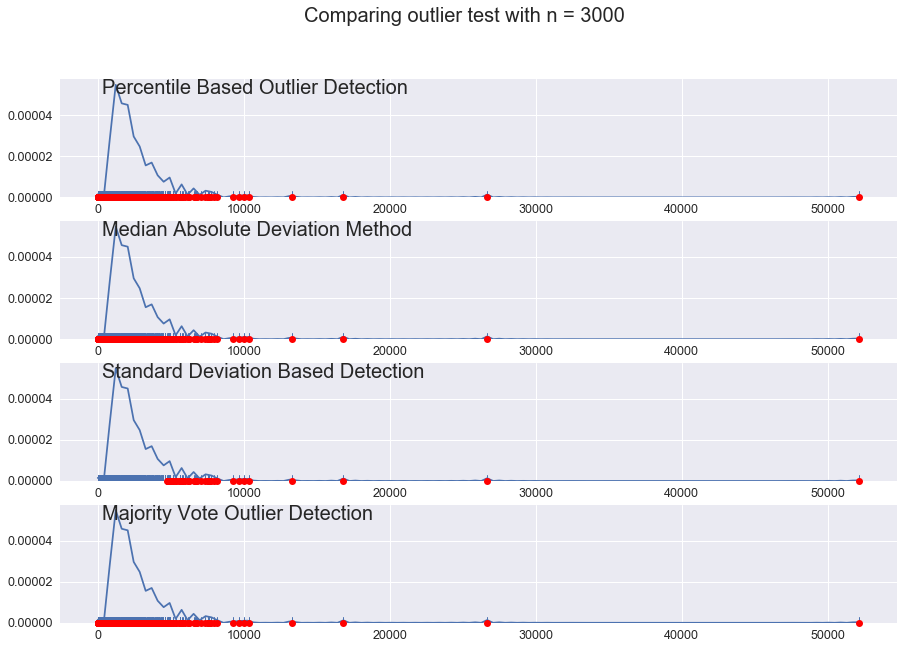

In [25]:
# Looking at Debt Ratio now ->
plotOutlier(credit_train['DebtRatio'].sample(3000).values)

In [26]:
# For this we are not sure how to remove outliers wo we will see which method got the most outliers and remove according to that
def outlierRatio(data):
    functions = [mad_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1
        
        outlierDict[str(func)[10:].split()[0]] = [count, "{:.2f}%".format((float(count))/len(data) * 100)]
        
    return outlierDict

In [27]:
outlierRatio(credit_train['DebtRatio'])

{'mad_outlier': [31727, '21.15%'],
 'outlierVote': [31727, '21.15%'],
 'std_div': [779, '0.52%']}

In [28]:
# So mad outlier detected most number of outliers we will remove outliers according to that.
minUpperBound = 5000

In [29]:
newDebtRatio = []
for val in credit_train['DebtRatio']:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)
credit_train['DebtRatio'] = newDebtRatio

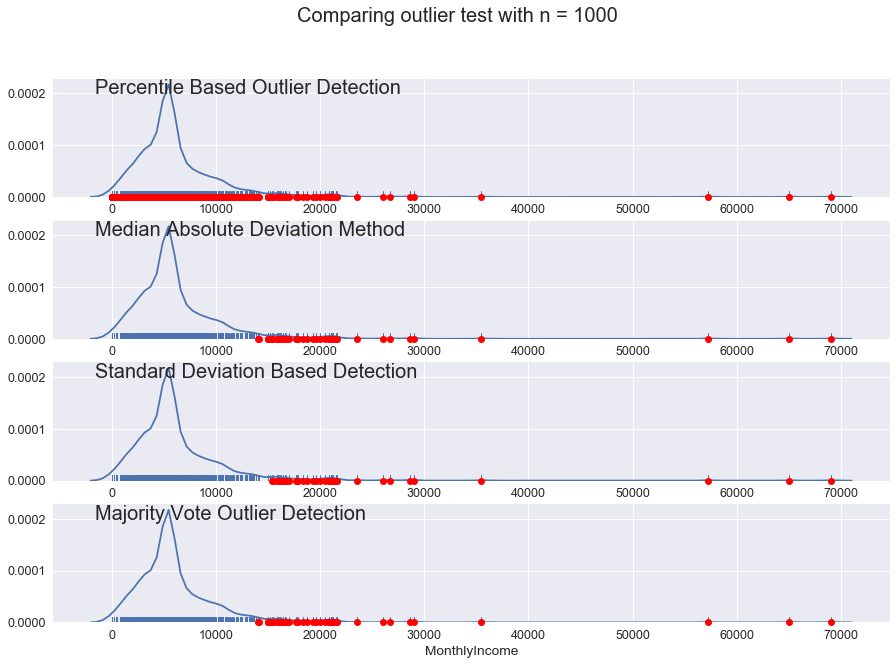

In [30]:
# For monthly Income ->
plotOutlier(credit_train.MonthlyIncome.sample(1000))

In [31]:
# Replacing outliers in this feature.
def replaceOutlier(data, method = outlierVote, replace = 'median'):
    vote = outlierVote(data)
    x = pd.DataFrame(list(zip(data, vote)), columns = ['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
            
    return debtNew

In [32]:
incomeNew = replaceOutlier(credit_train['MonthlyIncome'], replace = 'minUpper')

In [33]:
credit_train['MonthlyIncome'] = incomeNew

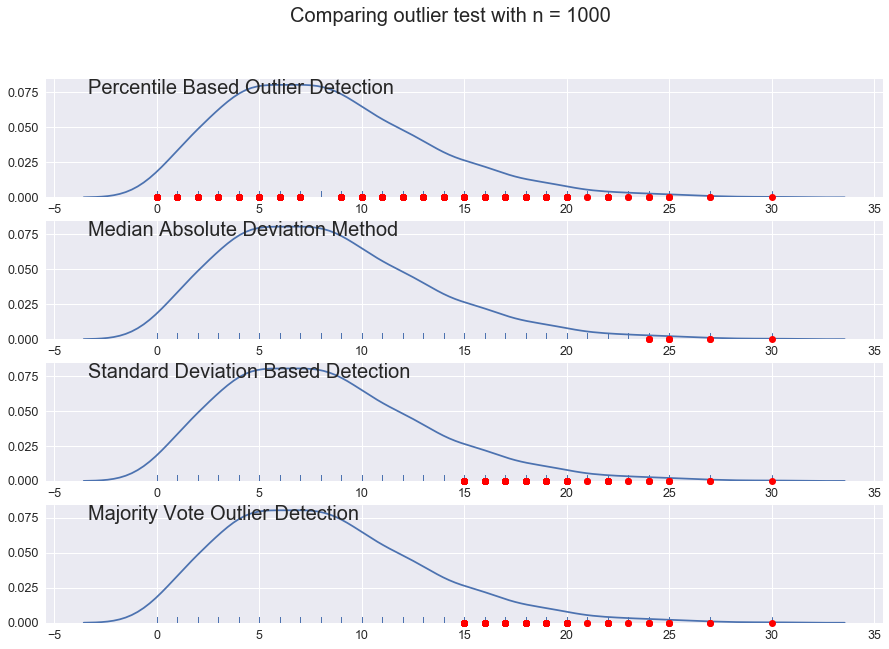

In [34]:
# Now for Open Credit Loans ->
plotOutlier(credit_train['NumberOfOpenCreditLinesAndLoans'].sample(1000).values)

> No need to do anything with credit loan feature

In [35]:
# For Number of 90 Days Late attribute ->
collections.Counter(credit_train['NumberOfTimes90DaysLate'])

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         12: 2,
         13: 4,
         14: 2,
         15: 2,
         17: 1,
         96: 5,
         98: 264})

In [36]:
# Removing 96 and 98:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
            
    return New

In [37]:
new = removeSpecificAndPutMedian(credit_train['NumberOfTimes90DaysLate'])

In [38]:
credit_train['NumberOfTimes90DaysLate'] = new

In [39]:
# Number of real state or loan lines attribute .
collections.Counter(credit_train['NumberRealEstateLoansOrLines'])

Counter({0: 56188,
         1: 52338,
         2: 31522,
         3: 6300,
         4: 2170,
         5: 689,
         6: 320,
         7: 171,
         8: 93,
         9: 78,
         10: 37,
         11: 23,
         12: 18,
         13: 15,
         14: 7,
         15: 7,
         16: 4,
         17: 4,
         18: 2,
         19: 2,
         20: 2,
         21: 1,
         23: 2,
         25: 3,
         26: 1,
         29: 1,
         32: 1,
         54: 1})

In [40]:
realNew = []
for val in credit_train['NumberRealEstateLoansOrLines']:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
    
credit_train['NumberRealEstateLoansOrLines'] = realNew

In [41]:
# Number of 60-89 days past attribute.
collections.Counter(credit_train['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

In [42]:
new = removeSpecificAndPutMedian(credit_train['NumberOfTime60-89DaysPastDueNotWorse'])
credit_train['NumberOfTime60-89DaysPastDueNotWorse'] = new

In [43]:
# Number of depends attribute ->
collections.Counter(credit_train['NumberOfDependents'])

Counter({0.0: 90826,
         1.0: 26316,
         2.0: 19522,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         7.0: 51,
         8.0: 24,
         9.0: 5,
         10.0: 5,
         13.0: 1,
         20.0: 1})

In [44]:
depNew = []
for val in  credit_train['NumberOfDependents']:
    if val > 10:
        depNew.append(10)
    else:
        depNew.append(val)

credit_train['NumberOfDependents'] = depNew

In [45]:
# End of outlier detection and removal --
credit_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.319195,52.295347,0.245353,316.757329,5954.22150,8.452760,0.090293,1.017407,0.064707,0.737327
std,0.249746,0.349480,14.771470,0.697231,908.035620,3227.28881,5.145951,0.485107,1.111560,0.329788,1.105968
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3903.00000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5400.00000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7400.00000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,0.999990,109.000000,13.000000,5000.000000,14128.00000,58.000000,17.000000,17.000000,11.000000,10.000000


In [46]:
credit_train.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0


## Feature Importance for training Base Line Model :
> There are several ways of finding important feature but we will use RandomForestClassifier to do so.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
X = credit_train.drop('SeriousDlqin2yrs', axis = 1)
y = credit_train['SeriousDlqin2yrs']
feature_labels = credit_train.columns[1:]
forest_clf = RandomForestClassifier(n_estimators = 1000, random_state = 0, verbose = 1)
forest_clf.fit(X,y)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  6.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

In [49]:
importance = forest_clf.feature_importances_
indices = np.argsort(importance)[::-1]
for i in range(X.shape[1]):
    print("%2d) %-*s %f" % (i + 1, 30, feature_labels[i], importance[indices[i]]))

 1) RevolvingUtilizationOfUnsecuredLines 0.186853
 2) age                            0.179980
 3) NumberOfTime30-59DaysPastDueNotWorse 0.147538
 4) DebtRatio                      0.132454
 5) MonthlyIncome                  0.093608
 6) NumberOfOpenCreditLinesAndLoans 0.087658
 7) NumberOfTimes90DaysLate        0.049138
 8) NumberRealEstateLoansOrLines   0.044765
 9) NumberOfTime60-89DaysPastDueNotWorse 0.043223
10) NumberOfDependents             0.034784


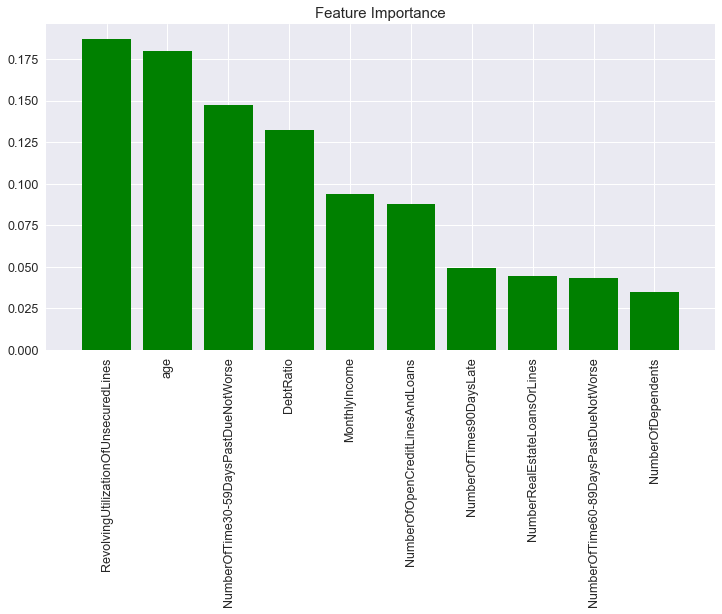

In [51]:
plt.figure(figsize=(12,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], color = 'green', align = 'center')
plt.xticks(range(X.shape[1]), feature_labels, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Training ML Models :

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [53]:
X = credit_train.drop('SeriousDlqin2yrs', axis = 1)
y = credit_train['SeriousDlqin2yrs']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [56]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, metric_params = None)
logistic = LogisticRegression(penalty = 'l1', C = 1.0, verbose = 2, tol = 0.0001)
adaboost = AdaBoostClassifier(base_estimator = None, n_estimators = 200, learning_rate = 1.0)
gbdt = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.1, n_estimators = 200, min_samples_split = 2,
                                  min_samples_leaf = 1, max_depth = 3, subsample = 1.0)
forest = RandomForestClassifier(n_estimators = 10)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [59]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [60]:
logistic.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=2, warm_start=False)

In [61]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Testing these base line models :

In [67]:
print ("Accuracy for k-Nearest Neighbours - ", knn.score(X_test, y_test))
print ("Accuracy for logistics regression - ", logistic.score(X_test, y_test))
print ("Accuracy for adaboost classifier - ", adaboost.score(X_test, y_test))
print ("Accuracy for gradient boosted decision trees - ", gbdt.score(X_test, y_test))
print ("Accuracy for random forest classifier - ", forest.score(X_test, y_test))

Accuracy for k-Nearest Neighbours -  0.932106666667
Accuracy for logistics regression -  0.937066666667
Accuracy for adaboost classifier -  0.936453333333
Accuracy for gradient boosted decision trees -  0.937733333333
Accuracy for random forest classifier -  0.933466666667


In [70]:
print(" ------------------- Using ROC Metric--------------------")
print ("1. KNN       -> ", roc_auc_score(y_test, knn.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print ("1. LR        -> ", roc_auc_score(y_test, logistic.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print ("1. AdaBoost  -> ", roc_auc_score(y_test, adaboost.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print ("4. GBDT      -> ", roc_auc_score(y_test, gbdt.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print ("5. RF        -> ", roc_auc_score(y_test, forest.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))

 ------------------- Using ROC Metric--------------------
1. KNN       ->  0.566853720892
1. LR        ->  0.848172697014
1. AdaBoost  ->  0.856896704088
4. GBDT      ->  0.863439287513
5. RF        ->  0.778895220536


** Observations **
> GBDT and Adaboost models which any kind of optimizations or hyper paramter tuning give us the best results.

## Improving the baseline models :-
1. Hyperparameter tuning.
2. Performing Cross-Validation.
3. Checking for overfitting or underfitting of models.

#### K-fold Cross-Validation :

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
# Writting cross validaion code so we dont have to write the same code again and again.
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5, verbose = 1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, verbose = verbose, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
        
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format(( cvDict[key][0])/(cvDict[cvDict.keys()[0]][0]) ),
                                     '{:0.2f}'.format(( cvDict[key][1])/(cvDict[cvDict.keys()[0]][1]) )]
            
    return cvDictNormalized

In [73]:
cvD = cvDictGen([knn, logistic, adaboost, gbdt, forest], scr = 'roc_auc')
cvD

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.6s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.4s finished


{'AdaBoostClassifier': [0.85860158720014168, 0.0022778297870612967],
 'GradientBoostingClassifier': [0.86405345585610804, 0.0027661762849478032],
 'KNeighborsClassifier': [0.57170491991621541, 0.0029056881861885789],
 'LogisticRegression': [0.85012514756556556, 0.003743433817166322],
 'RandomForestClassifier': [0.77772188272348264, 0.0037353774418533302]}

** Observations **
1. The ROC Score does not deviate much so we are suffering from overfitting.

### Hyperparamter Tuning :-

In [74]:
adaParams = {'n_estimators':[10,50,100,200,400]}
from sklearn.model_selection import RandomizedSearchCV

In [75]:
ada = RandomizedSearchCV(estimator = adaboost, param_distributions = adaParams, n_iter = 5, scoring = 'roc_auc',
                         fit_params = None, cv = None, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.7s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.3s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   6.2s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   6.9s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.0min finished


In [76]:
ada.best_estimator_, ada.best_score_

(AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=1.0, n_estimators=100, random_state=None),
 0.85803264012579339)

In [79]:
# Hyper parameter tuning for GBDT :
from random import randint
gbParams = {'loss': ['deviance', 'exponential'],
            'n_estimators': [10, 50, 100, 200, 400],
            'max_depth': [3,5,7,9]}

In [80]:
gb = RandomizedSearchCV(estimator = gbdt, param_distributions = gbParams, n_iter = 10, scoring = 'roc_auc', fit_params = None,
                       cv = None, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, max_depth=9, loss=exponential .................
[CV] .. n_estimators=200, max_depth=9, loss=exponential, total= 1.5min
[CV] n_estimators=200, max_depth=9, loss=exponential .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] .. n_estimators=200, max_depth=9, loss=exponential, total= 1.5min
[CV] n_estimators=200, max_depth=9, loss=exponential .................
[CV] .. n_estimators=200, max_depth=9, loss=exponential, total= 1.5min
[CV] n_estimators=400, max_depth=9, loss=exponential .................
[CV] .. n_estimators=400, max_depth=9, loss=exponential, total= 2.8min
[CV] n_estimators=400, max_depth=9, loss=exponential .................
[CV] .. n_estimators=400, max_depth=9, loss=exponential, total= 2.8min
[CV] n_estimators=400, max_depth=9, loss=exponential .................
[CV] .. n_estimators=400, max_depth=9, loss=exponential, total= 3.0min
[CV] n_estimators=200, max_depth=3, loss=exponential .................
[CV] .. n_estimators=200, max_depth=3, loss=exponential, total=  11.3s
[CV] n_estimators=200, max_depth=3, loss=exponential .................
[CV] .. n_estimators=200, max_depth=3, loss=exponential, total=  11.4s
[CV] n_estimators=200, max_depth=3, loss=exponential .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 26.4min finished


In [81]:
gb.best_estimator_, gb.best_score_

(GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='exponential', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=200,
               presort='auto', random_state=None, subsample=1.0, verbose=0,
               warm_start=False), 0.86373140167859097)

#### Training best models with parameters found :

In [82]:
bestadaboost = ada.best_estimator_.fit(X_train, y_train)
bestgbdt = gb.best_estimator_.fit(X_train, y_train)

In [83]:
# Testing the trained Models :
print("Best adaboost-> ",roc_auc_score(y_test, bestadaboost.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))
print("Best GBDT    -> ",roc_auc_score(y_test, bestgbdt.predict_proba(X_test)[:,1], average = 'macro', sample_weight = None))

Best adaboost->  0.857738755761
Best GBDT    ->  0.863824427628


** Conclusions **
> Even after hyperparamter tuning with cross-validation the score hasnt improved much (just a little improvement is there)
<br>
> We will explore other untouched ares to try to increase the accuracy of the classifier even higher than it already is.

## Feature Engineering :
> This is one area we havent touched we will see if transforming features help us acheive a higher roc score.

In [84]:
from sklearn.preprocessing import FunctionTransformer

In [87]:
# We are taking log because the feature values are very skewed and spread out.
transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [89]:
bestadaboost_transformed = ada.best_estimator_.fit(X_train_transform, y_train)

In [90]:
bestgbdt_transformed = gb.best_estimator_.fit(X_train_transform, y_train)

In [91]:
cvDictBestParam_transform = cvDictGen(functions=[bestadaboost_transformed, bestgbdt_transformed], scr='roc_auc')

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


In [92]:
cvDictBestParam_transform

{'AdaBoostClassifier': [0.85894205256440603, 0.0029128923752852281],
 'GradientBoostingClassifier': [0.8644816907780275, 0.0030517503371390894]}

> Still a little increment in accuracy not much.

### Voting Based Ensemble Method :-

In [93]:
from sklearn.ensemble import VotingClassifier

In [94]:
voting_clf = VotingClassifier(estimators=[('gb', bestgbdt_transformed), ('ada', bestadaboost_transformed)], voting='soft',
                             weights=[2,1])
voting_clf = voting_clf.fit(X_train_transform, y_train)

In [96]:
X_test_transform = transformer.transform(X_test)
test_labels = voting_clf.predict_proba(X_test_transform)[:,1]

In [97]:
voting_clf.score(X_test_transform, y_test)

0.93765333333333334

In [98]:
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.86377772223616123

In [100]:
voting_clf_old = VotingClassifier(estimators=[('gb', bestgbdt_transformed), ('ada', bestadaboost_transformed)], voting='soft',
                                                weights=[2,1])
voting_clf_old = voting_clf_old.fit(X_train, y_train)

In [101]:
test_labels = voting_clf_old.predict_proba(X_test)[:,1]
voting_clf_old.score(X_test, y_test)

0.93762666666666672

In [102]:
roc_auc_score(y_test, test_labels, average='macro', sample_weight=None)

0.86377224639195826

** Conclusion ** 
> This accuracy is the highest accuracy obtained

### Running Model on Test Data:

In [109]:
credit_test = pd.read_csv('cs-test.csv')
credit_test = credit_test.drop('Unnamed: 0', axis = 1)
credit_test.drop('SeriousDlqin2yrs', axis = 1, inplace=True)
credit_test.fillna(credit_train.median(), inplace=True)

In [110]:
test_labels_votingOld = voting_clf_old.predict_proba(credit_test)[:,1]
print (len(test_labels_votingOld))

101503


In [111]:
output = pd.DataFrame({'ID': credit_test.index, 'Probability': test_labels_votingOld})

In [112]:
output.to_csv("./predictions.csv", index = False)